In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/agent_based_sim")
from multi_agent_sim import MultiAgentSim

In [2]:
def run_trajectories(nb_r_multiplier, nreps=5, max_infections=200, 
                     use_testing=True, use_contact_trace=True, use_adaptive_testing=True,
                    use_pessimistic_detectability_curve=False):

    T = 12 * 7
    max_infections = 200
    infection_counts = {}
    for rep in range(nreps):
        sim = MultiAgentSim(n_agents=1000, init_infection_p = 0.005, nb_r_multiplier = nb_r_multiplier,
                           use_contact_trace=use_contact_trace, use_testing=use_testing,
                           use_adaptive_testing=use_adaptive_testing,
                           use_pessimistic_detectability_curve=use_pessimistic_detectability_curve)
        infection_counts[rep] = [len(sim.get_infected_agents())]
        for t in range(T):
            sim.step()
            infection_counts[rep].append(len(sim.get_infected_agents()))
            if infection_counts[rep][-1] >= max_infections:
                break
        print("done rep # {}".format(rep))
    return infection_counts

In [4]:
results = {}
rs_to_try = [1/6 * (x+1) for x in range(8)]
print([3*r for r in rs_to_try])

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.4999999999999996, 4.0]


In [ ]:
intervention_combos = [(False, False, False), (True, False, False), (True, True, False), (True, True, True)]

for use_testing, use_contact_trace, use_adaptive_testing in intervention_combos:
    results[(use_testing, use_contact_trace, use_adaptive_testing)] = {}
    subresults = results[(use_testing, use_contact_trace, use_adaptive_testing)]
    for r in rs_to_try:
        subresults[r] = run_trajectories(r, use_testing=use_testing, 
                                             use_contact_trace=use_contact_trace, 
                                             use_adaptive_testing=use_adaptive_testing,
                                        use_pessimistic_detectability_curve=True, nreps=20)
        print("done r {}".format(r))
    print("done {}, {}, {}\n".format(use_testing, use_contact_trace, use_adaptive_testing))

done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep # 9
done rep # 10
done rep # 11
done rep # 12
done rep # 13
done rep # 14
done rep # 15
done rep # 16
done rep # 17
done rep # 18
done rep # 19
done r 0.16666666666666666
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep # 9
done rep # 10
done rep # 11
done rep # 12
done rep # 13
done rep # 14
done rep # 15
done rep # 16
done rep # 17
done rep # 18
done rep # 19
done r 0.3333333333333333
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep # 9
done rep # 10
done rep # 11
done rep # 12
done rep # 13
done rep # 14
done rep # 15
done rep # 16
done rep # 17
done rep # 18
done rep # 19
done r 0.5
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep 

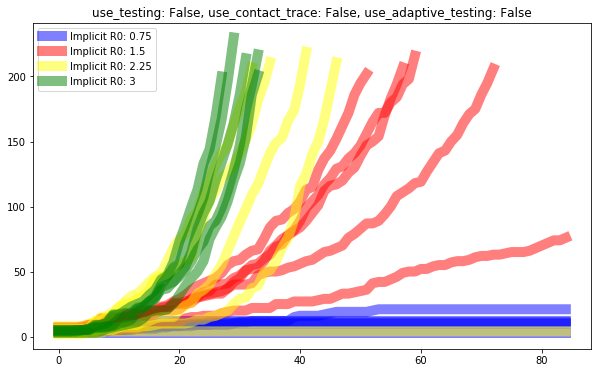

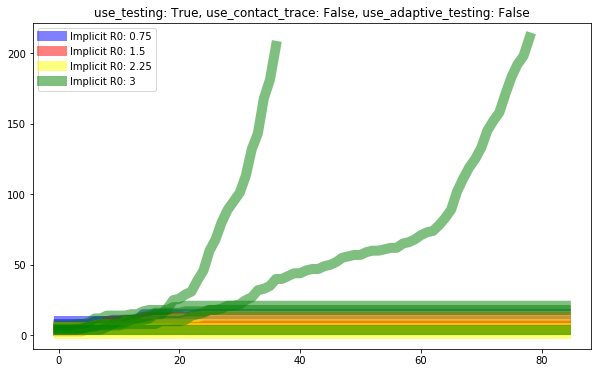

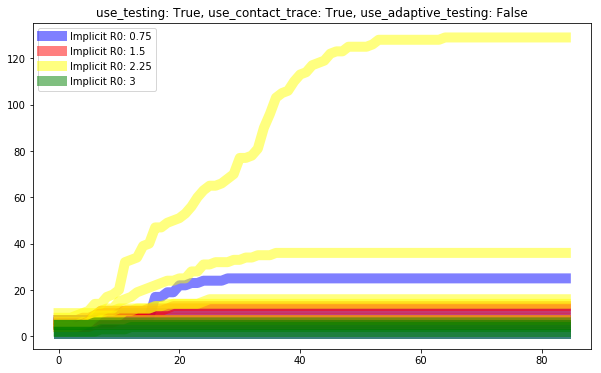

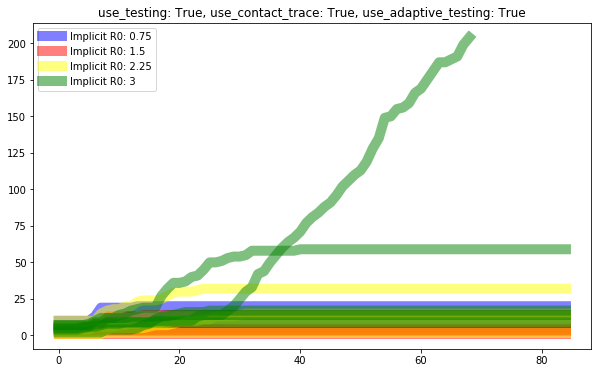

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_plot(subresults, title):
    colours = ['blue', 'red', 'yellow', 'green', 'black', 'orange', 'purple']
    colour_idx = 0
    plt.figure(figsize=(10,6))
    for r in rs_to_try:
        include_legend = True
        colour = colours[colour_idx]
        for trajectory in subresults[r].values():
            xs = list(range(len(trajectory)))
            if include_legend:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, label="Implicit R0: {}".format(r * 3), color=colour)
                include_legend = False
            else:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, color=colour)

        colour_idx += 1
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

for combo in intervention_combos:
    make_plot(results[combo], "use_testing: {}, use_contact_trace: {}, use_adaptive_testing: {}".format(*combo))

In [ ]:
more_results = {}
more_rs_to_try = [1/3, 2/3, 1, 4/3, 5/3, 6/3]
intervention_combos = [(False, False, False), (True, False, False), (True, True, False), (True, True, True)]
for use_testing, use_contact_trace, use_adaptive_testing in intervention_combos:
    more_results[(use_testing, use_contact_trace, use_adaptive_testing)] = {}
    subresults = more_results[(use_testing, use_contact_trace, use_adaptive_testing)]
    for r in more_rs_to_try:
        subresults[r] = run_trajectories(r, nreps=50, use_testing=use_testing, 
                                             use_contact_trace=use_contact_trace, 
                                             use_adaptive_testing=use_adaptive_testing)
        print("done r {}".format(r))
    print("done {}, {}, {}\n".format(use_testing, use_contact_trace, use_adaptive_testing))

done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep # 9
done rep # 10
done rep # 11
done rep # 12
done rep # 13
done rep # 14
done rep # 15
done rep # 16
done rep # 17
done rep # 18
done rep # 19
done rep # 20
done rep # 21
done rep # 22
done rep # 23
done rep # 24
done rep # 25
done rep # 26
done rep # 27
done rep # 28
done rep # 29
done rep # 30
done rep # 31
done rep # 32
done rep # 33
done rep # 34
done rep # 35
done rep # 36
done rep # 37
done rep # 38
done rep # 39
done rep # 40
done rep # 41
done rep # 42
done rep # 43
done rep # 44
done rep # 45
done rep # 46
done rep # 47
done rep # 48
done rep # 49
done r 0.3333333333333333
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done rep # 5
done rep # 6
done rep # 7
done rep # 8
done rep # 9
done rep # 10
done rep # 11
done rep # 12
done rep # 13
done rep # 14
done rep # 15
done rep # 16
done rep # 17
done rep # 18
done rep # 19
done rep # 20


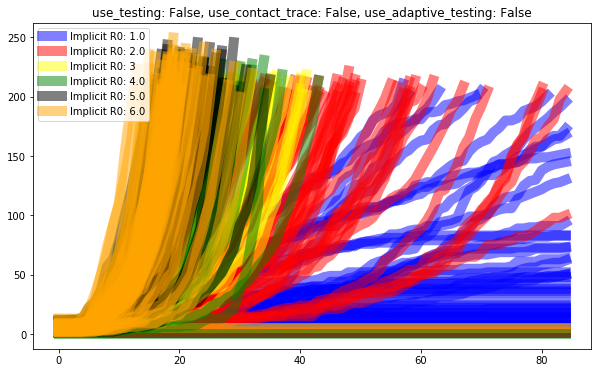

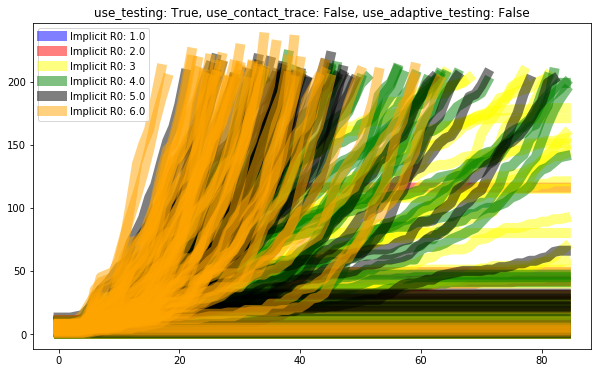

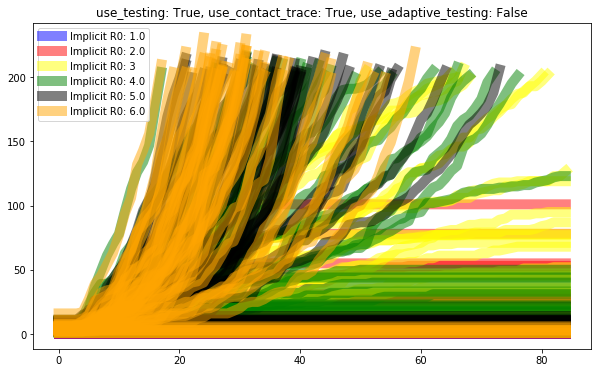

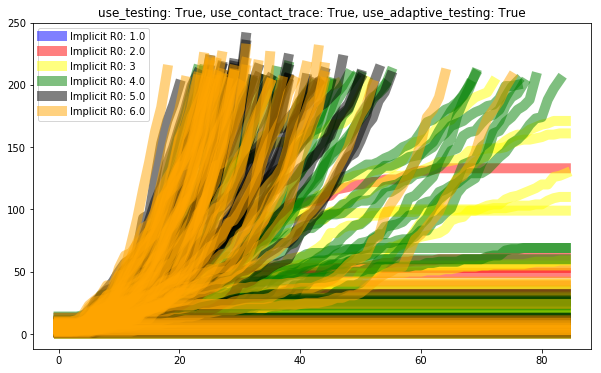

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_plot(subresults, title):
    colours = ['blue', 'red', 'yellow', 'green', 'black', 'orange', 'purple']
    colour_idx = 0
    plt.figure(figsize=(10,6))
    for r in more_rs_to_try:
        include_legend = True
        colour = colours[colour_idx]
        for trajectory in subresults[r].values():
            xs = list(range(len(trajectory)))
            if include_legend:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, label="Implicit R0: {}".format(r * 3), color=colour)
                include_legend = False
            else:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, color=colour)

        colour_idx += 1
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

for combo in intervention_combos:
    make_plot(more_results[combo], "use_testing: {}, use_contact_trace: {}, use_adaptive_testing: {}".format(*combo))

Text(0,0.5,'average infections (each trajectory stopped if exceeds 200)')

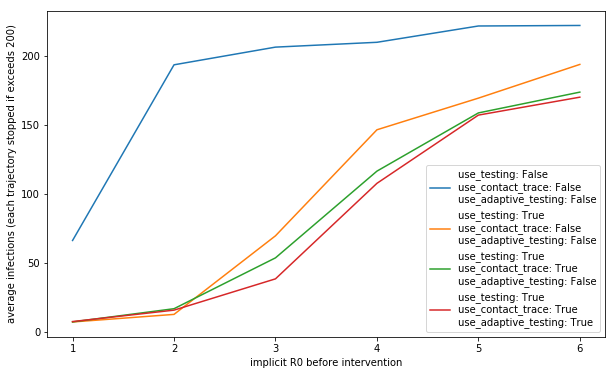

In [14]:
implicit_R0s = [3 * r for r in more_rs_to_try]
plt.figure(figsize=(10,6))
for combo in intervention_combos:
    subresults = more_results[combo]
    avg_infections = []
    for r in more_rs_to_try:
        avg_infections.append(np.mean([trajectory[-1] for trajectory in subresults[r].values()]))
    
    plt.plot(implicit_R0s, avg_infections, label="use_testing: {}\nuse_contact_trace: {}\nuse_adaptive_testing: {}".format(*combo))
plt.legend(loc='best')
plt.xlabel("implicit R0 before intervention")
plt.ylabel("average infections (each trajectory stopped if exceeds 200)")

Text(0,0.5,'number of trajectories (out of a total of 50) where infections exceed 200')

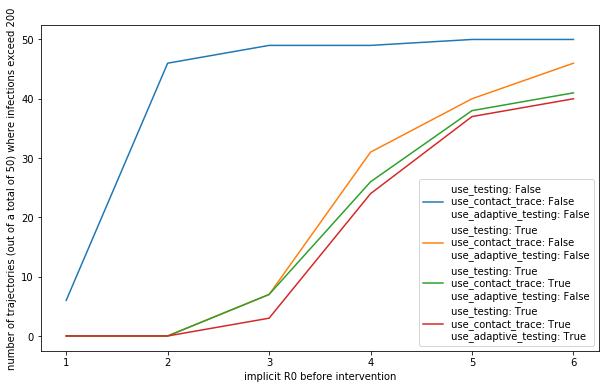

In [15]:
implicit_R0s = [3 * r for r in more_rs_to_try]
plt.figure(figsize=(10,6))
for combo in intervention_combos:
    subresults = more_results[combo]
    num_outbreaks = []
    for r in more_rs_to_try:
        num_outbreaks.append(len([trajectory[-1] for trajectory in subresults[r].values() if trajectory[-1] >= 200]))
    
    plt.plot(implicit_R0s, num_outbreaks, label="use_testing: {}\nuse_contact_trace: {}\nuse_adaptive_testing: {}".format(*combo))
plt.legend(loc='best')
plt.xlabel("implicit R0 before intervention")
plt.ylabel("number of trajectories (out of a total of 50) where infections exceed 200")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_plot(subresults, title):
    colours = ['blue', 'red', 'yellow', 'green', 'black', 'orange', 'purple']
    colour_idx = 0
    plt.figure(figsize=(10,6))
    for r in more_rs_to_try:
        include_legend = True
        colour = colours[colour_idx]
        for trajectory in subresults[r].values():
            xs = list(range(len(trajectory)))
            if include_legend:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, label="Implicit R0: {}".format(r * 3), color=colour)
                include_legend = False
            else:
                plt.plot(xs, trajectory, alpha=0.5, linewidth=10, color=colour)

        colour_idx += 1
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

for combo in intervention_combos:
    make_plot(more_results[combo], "use_testing: {}, use_contact_trace: {}, use_adaptive_testing: {}".format(*combo))